In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 


n_df= pd.read_csv('normalized_db.csv')
n_df

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
0,100i,-0.106467,48143,-0.335195,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",-0.562685,2020,-0.469479,0.425948,1.104798,-0.458320,-0.587413,-0.472449
1,125a,-0.106467,48143,-0.335195,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",-0.532720,2020,-0.422583,0.425948,1.104798,-0.458320,-0.587413,-0.472449
2,135c,-0.105902,48143,-0.335195,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",-0.517738,2020,-0.432900,0.425948,1.104798,-0.458320,-0.587413,-0.472449
3,300i,-0.105619,79677,-0.335195,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",-0.532720,2014,-0.445093,0.425948,1.104798,-0.321787,-0.411807,-0.286839
4,315p,-0.105054,80592,-0.335195,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},-0.517738,2014,-0.432900,0.425948,1.104798,-0.321787,-0.411807,-0.286839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,X1 Force,-0.106750,4730,-0.335195,Origin Jumpworks,exploration,flight-ready,{'0': 'Combat'},-0.562685,2023,-0.577340,0.089224,-0.917820,-0.756133,-0.826588,-0.666101
197,X1 Velocity,-0.106750,4730,-0.335195,Origin Jumpworks,competition,flight-ready,{'0': 'Racing'},-0.577667,2023,-0.578747,0.184523,-0.818579,-0.756133,-0.826588,-0.666101
198,Zeus CL Mk II,-0.088659,295000,-0.021096,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},-0.263043,2024,0.132134,0.044752,0.100578,-0.002640,0.195789,-0.348709
199,Zeus ES Mk II,-0.102227,295000,-0.021096,Roberts Space Industries,exploration,flight-ready,{'0': 'Expedition'},-0.263043,2024,-0.121106,0.044752,0.218721,-0.002640,0.195789,-0.348709


In [8]:
n_df.keys()

Index(['name                       ', 'cargo_capacity ', 'mass      ', 'crew ',
       'manufacturer                              ', 'type        ',
       'status       ', 'role                                           ',
       'price  ', 'release_date ', 'price_ingame   ', 'scm    ', 'max    ',
       'length ', 'beam   ', 'height'],
      dtype='object')

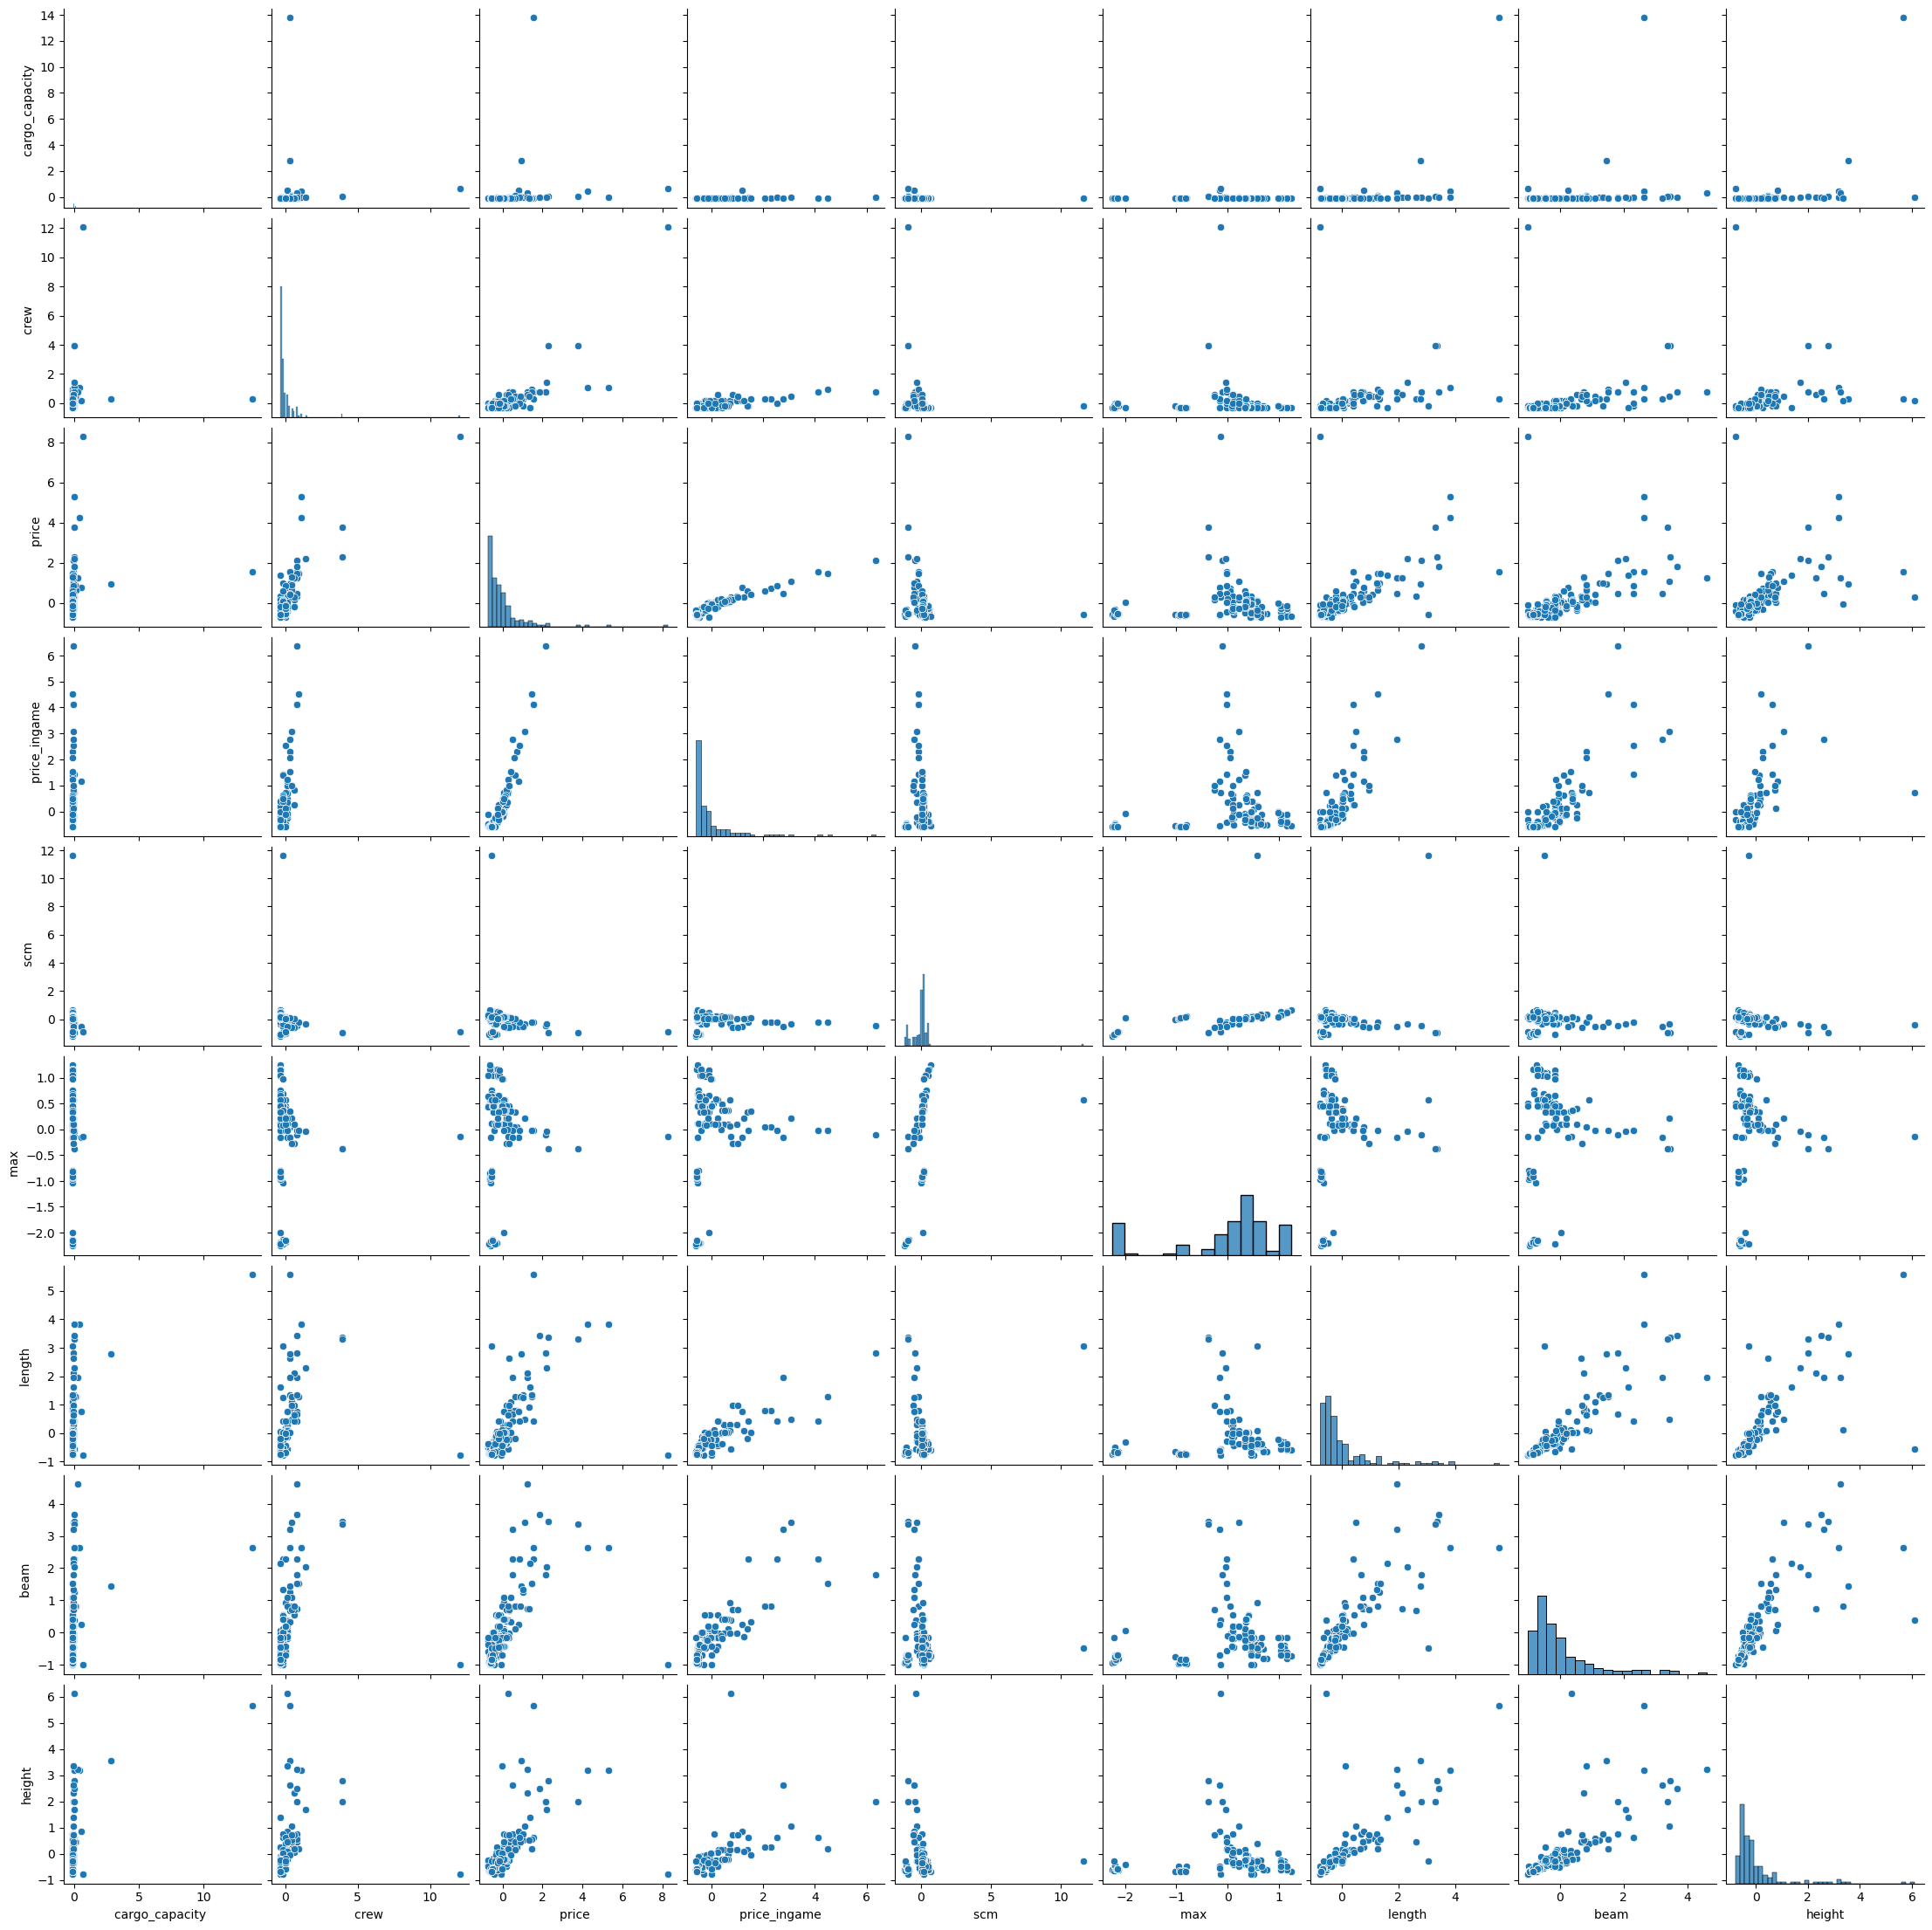

In [3]:
sns.pairplot(n_df)

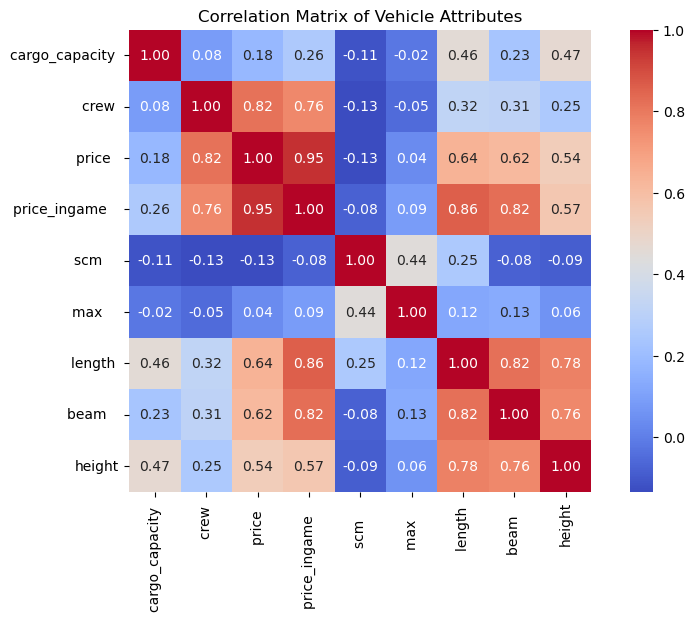

In [5]:
colonnes_numeriques = n_df.select_dtypes(include=['int64', 'float64'])

correlation = colonnes_numeriques.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Vehicle Attributes')
plt.show()

In [9]:
n_df.sort_values('type        ')

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
200,Zeus MR Mk II,-0.104489,,-0.021096,Roberts Space Industries,combat,in-concept,{'0': 'Interdiction'},-0.143187,Unreleased,NaN,NaN,NaN,-0.002640,0.195789,-0.286839
90,Glaive,-0.106750,72091,-0.335195,Esperia,combat,flight-ready,{'0': 'Medium Fighter'},0.336239,2014,NaN,0.171817,0.455008,-0.219387,-0.165959,-0.224969
89,Gladius,-0.106750,51352,-0.335195,Aegis Dynamics,combat,flight-ready,{'0': 'Light Fighter'},-0.442828,2015,-0.338169,0.203583,0.644038,-0.424187,-0.394246,-0.441514
88,Gladiator,-0.106750,88408,-0.178145,Anvil Aerospace,combat,flight-ready,{'0': 'Bomber'},-0.218097,2015,-0.127136,0.108284,0.395937,-0.394320,-0.271322,-0.410579
168,San'tok.yāi,-0.106750,88524,-0.335195,Aopoa,combat,flight-ready,{'0': 'Medium Fighter'},0.006634,2023,0.403463,0.216290,0.481000,-0.372987,-0.201080,-0.224969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Freelancer,-0.097422,231696,0.135953,Musashi Industrial and Starflight Concern,transport,flight-ready,{'0': 'Medium Freight'},-0.382900,2016,-0.259785,0.025692,0.124206,-0.134053,-0.183519,-0.194034
62,E1 Spirit,-0.106750,,-0.178145,Crusader Industries,transport,in-concept,{'0': 'Passenger'},-0.263043,Unreleased,NaN,0.070165,0.407751,0.011014,0.518904,-0.163099
148,Railen,-0.061522,,0.135953,Gatac Manufacture,transport,in-concept,{'0': 'Medium Freight'},-0.038312,Unreleased,NaN,NaN,NaN,0.121947,0.817433,3.363481
51,Cutter,-0.106185,86877,-0.335195,Drake Interplanetary,transport,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",-0.577667,2022,-0.524942,-0.082314,0.124206,-0.441253,-0.446928,-0.410579


In [16]:
list(stardle_db.sort_values('type')['type'])

['combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'expl

In [ ]:
for i in list(stardle_db.sort_values('type')['type']):
    
    


exploration_ships = stardle_db[stardle_db['type'] == 'exploration']
exploration_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
315p,315p,27,12,80592,1,1425,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014
400i,400i,56,42,430057,3,1000,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},250.0,2021
600i Explorer,600i Explorer,91.5,44,1622067,5,975,Origin Jumpworks,exploration,flight-ready,{'0': 'Expedition'},475.0,2018
600i Touring,600i Touring,91.5,20,1613414,5,975,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},435.0,2018
85X,85X,13.5,0,19834,2,1250,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},50.0,2016
890 Jump,890 Jump,210,388,44237159,8,915,Origin Jumpworks,exploration,flight-ready,{'0': 'Luxury Touring'},950.0,2019
Aurora LX,Aurora LX,19,3,26736,1,1200,Roberts Space Industries,exploration,flight-ready,{'0': 'Pathfinder'},35.0,2014
C8 Pisces,C8 Pisces,16,4,48143,3,1150,Anvil Aerospace,exploration,flight-ready,{'0': 'Exploration'},0.0,2019
C8X Pisces Expedition,C8X Pisces Expedition,16,4,48143,3,1150,Anvil Aerospace,exploration,flight-ready,{'0': 'Expedition'},45.0,2019
Carrack,Carrack,74,456,4397858,6,1050,Anvil Aerospace,exploration,flight-ready,{'0': 'Expedition'},600.0,2019


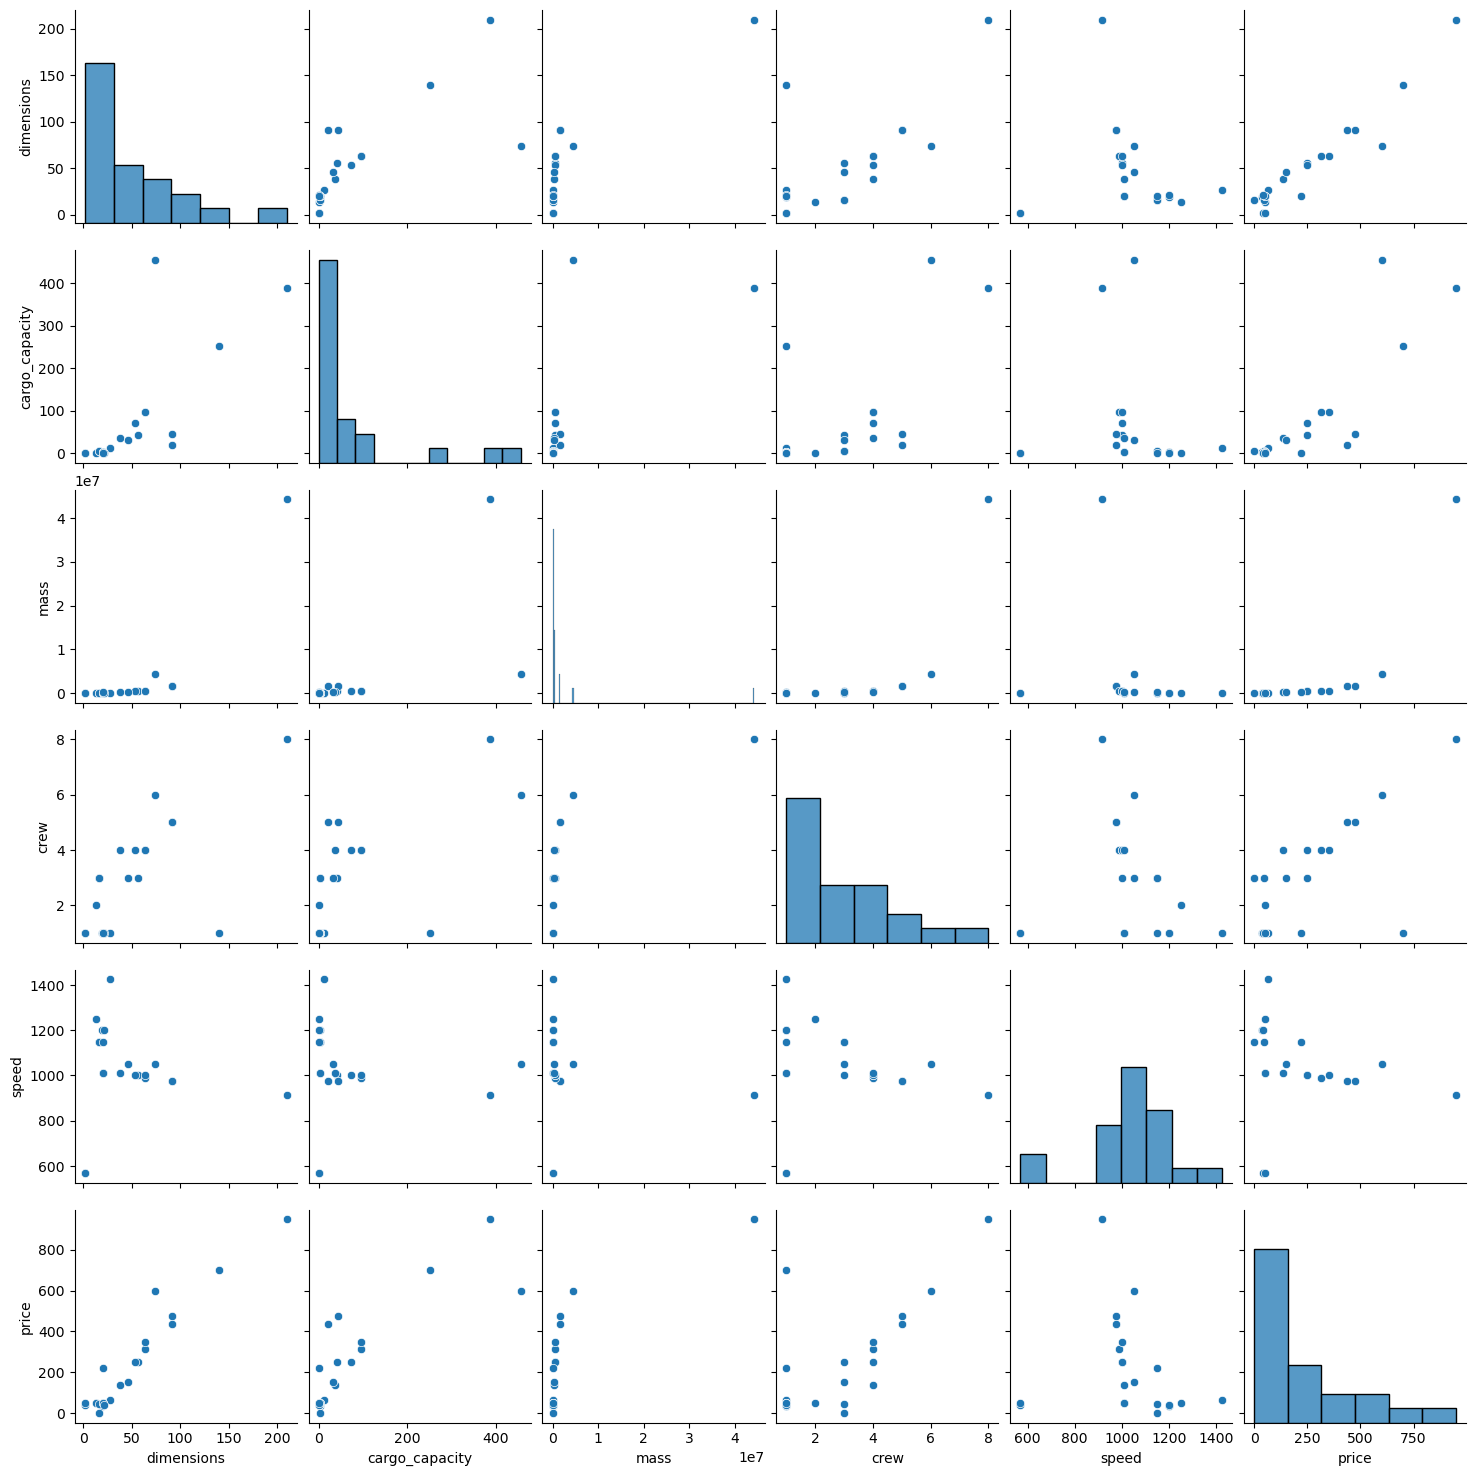

In [ ]:
sns.pairplot(exploration_ships)

In [ ]:
combat_ships = stardle_db[stardle_db['type'] == 'combat']
combat_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
325a,325a,27.5,4,79324,1,1425,Origin Jumpworks,combat,flight-ready,"{'0': 'Light Fighter', '1': 'Interdiction'}",70.0,2014
A1 Spirit,A1 Spirit,44,0,314271,2,1130,Crusader Industries,combat,flight-ready,{'0': 'Bomber'},200.0,2023
A2 Hercules,A2 Hercules,70,216,3139240,8,950,Crusader Industries,combat,flight-ready,{'0': 'Heavy Bomber'},750.0,2021
Ares Star Fighter Inferno,Ares Star Fighter Inferno,27,0,329001,1,1100,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021
Ares Star Fighter Ion,Ares Star Fighter Ion,27,0,329001,1,1100,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanguard Harbinger,Vanguard Harbinger,48,0,236604,2,1115,Aegis Dynamics,combat,flight-ready,{'0': 'Bomber'},290.0,2019
Vanguard Hoplite,Vanguard Hoplite,48,0,234870,2,1115,Aegis Dynamics,combat,flight-ready,{'0': 'Dropship'},240.0,2016
Vanguard Sentinel,Vanguard Sentinel,48,0,232170,2,1111,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'},275.0,2019
Vanguard Warden,Vanguard Warden,48,0,244270,2,1111,Aegis Dynamics,combat,flight-ready,{'0': 'Heavy Fighter'},260.0,2016


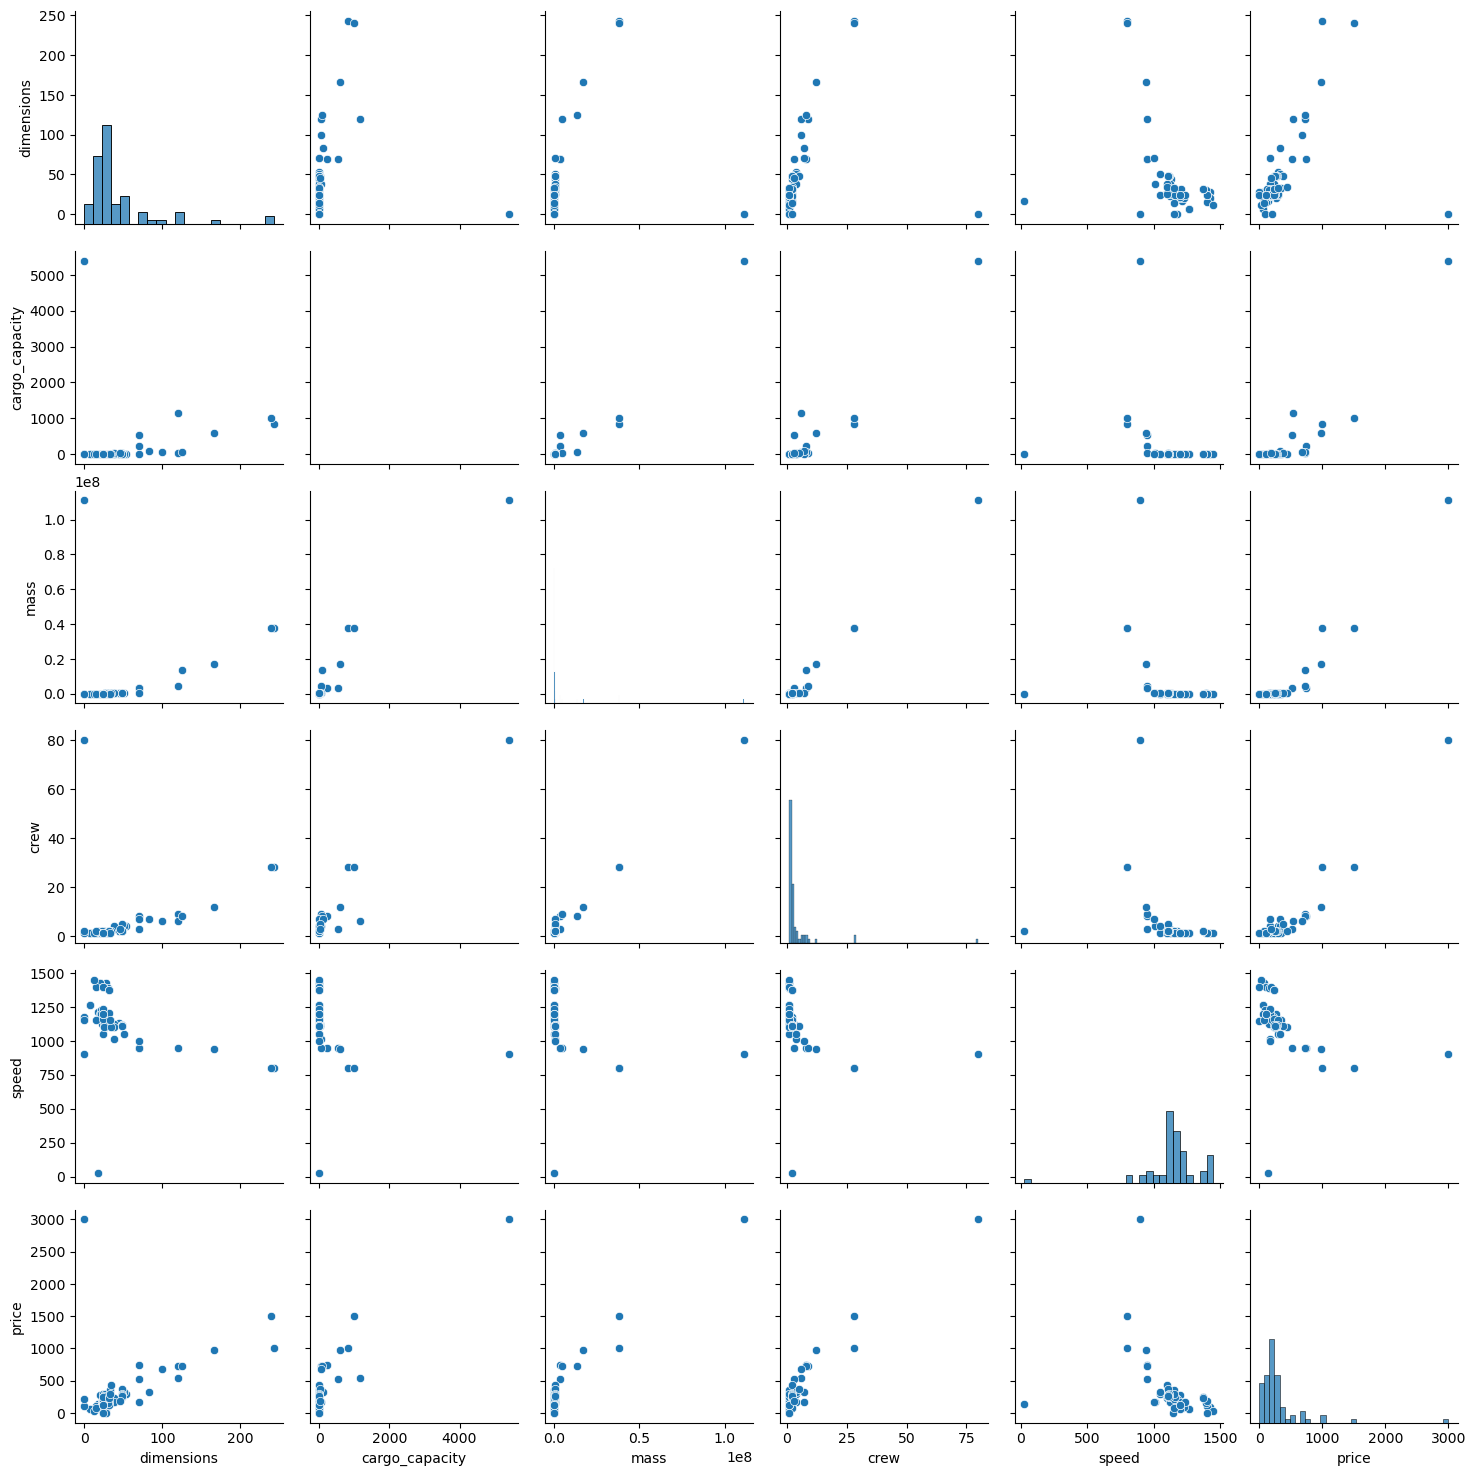

In [ ]:
sns.pairplot(combat_ships)

In [ ]:
transport_ships = stardle_db[stardle_db['type'] == 'transport']
transport_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
Aurora CL,Aurora CL,19,6,26422,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Freight'},45.0,2014
Aurora LN,Aurora LN,19,3,28714,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Fighter'},40.0,2014
Aurora MR,Aurora MR,19,3,27893,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Fighter'},30.0,2014
Avenger Titan,Avenger Titan,20,8,51363,1,1425,Aegis Dynamics,transport,flight-ready,{'0': 'Light Freight'},60.0,2014
C1 Spirit,C1 Spirit,44,64,314271,2,1130,Crusader Industries,transport,flight-ready,{'0': 'Medium Freight'},125.0,2023
C2 Hercules,C2 Hercules,70,696,3139240,2,950,Crusader Industries,transport,flight-ready,{'0': 'Heavy Freight'},400.0,2021
Caterpillar,Caterpillar,13.4,576,1660063,4,900,Drake Interplanetary,transport,flight-ready,{'0': 'Heavy Freight'},330.0,2016
Caterpillar Pirate Edition,Caterpillar Pirate Edition,13.4,576,1660063,4,900,Drake Interplanetary,transport,flight-ready,{'0': 'Heavy Freight'},330.0,2016
Constellation Taurus,Constellation Taurus,70,174,427001,4,1000,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},200.0,2021
Cutter,Cutter,20,4,86877,1,1010,Drake Interplanetary,transport,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",45.0,2022


In [ ]:
multi_ships = stardle_db[stardle_db['type'] == 'multi']
multi_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
100i,100i,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020
125a,125a,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020
135c,135c,19,6,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020
300i,300i,27,8,79677,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014
Aurora ES,Aurora ES,19,3,26486,1,1200,Roberts Space Industries,multi,flight-ready,"{'0': 'Starter', '1': 'Pathfinder'}",20.0,2014
Constellation Andromeda,Constellation Andromeda,63.5,96,430057,4,1000,Roberts Space Industries,multi,flight-ready,"{'0': 'Medium Freight', '1': 'Gunship'}",240.0,2015
Cutlass Black,Cutlass Black,37.5,46,246577,3,1125,Drake Interplanetary,multi,flight-ready,{'0': 'Medium Freight'},110.0,2014
Galaxy,Galaxy,110,64,None,6,None,Roberts Space Industries,multi,in-concept,{'0': 'Modular'},380.0,Unreleased
Mustang Alpha,Mustang Alpha,21.5,4,34221,1,1200,Consolidated Outland,multi,flight-ready,{'0': 'Cargo'},30.0,2014
Nomad,Nomad,19,24,228123,1,1100,Consolidated Outland,multi,flight-ready,{'0': 'Starter'},80.0,2020
